# Representing a Vector

In nengo, ensembles of neurons represent information. In this model, you will represent a two-dimensional vector with a single ensemble of LIF (leaky integrate-and-fire) neurons. Though this is a case of two-dimensional vector representation, but the ideas naturally generalize to any dimension.

In [2]:
#Setup the envirnment
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import nengo
from nengo.dists import Uniform

## Create the Model

This model has paramenters as described in the book, with the neurons in the ensemble having two dimensions. Since the default max rates in Nengo 2.0 are (200, 400), so you have to explicitly specify them to be (100, 200) to create the same model as in the book. The default values of tauRC, tauRef, intercepts, radius and expected noise in Nengo 2.0 are same as those mentioned in the book.

In [3]:
model = nengo.Network(label='2D Representation')
with model:
    #Input Nodes
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)
    
    #Ensemble with 100 LIF neurons which represents a 2-dimensional signal
    x = nengo.Ensemble(100, dimensions=2, max_rates=Uniform(100, 200))
    
    #Get the neuron encoders
    encoders = x.encoders.sample(100,2)
    
    #Connecnting input to ensemble
    #The indices in ensemble 'x' define which dimension the input will project to
    nengo.Connection(sin, x[0])
    nengo.Connection(cos, x[1])

## Add Probes to Collect Data

In [4]:
with model:
    sin_probe = nengo.Probe(sin)                   
    cos_probe = nengo.Probe(cos)                   
    x_probe = nengo.Probe(x, synapse=0.01)   # Decoded ouput of the ensemble

## Run the model

Import the nengo_gui visualizer to run and visualize the model.

In [ ]:
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "vectors.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The `cos` and `sin` graphs show the two dimensional input provided to the ensemble and the top right graph shows the the decoded estimate of this two dimensional input. The graph on bottom right shows the XY-value i.e., the state represented by one dimension of the ensemble vs the state represented by the other dimension. 

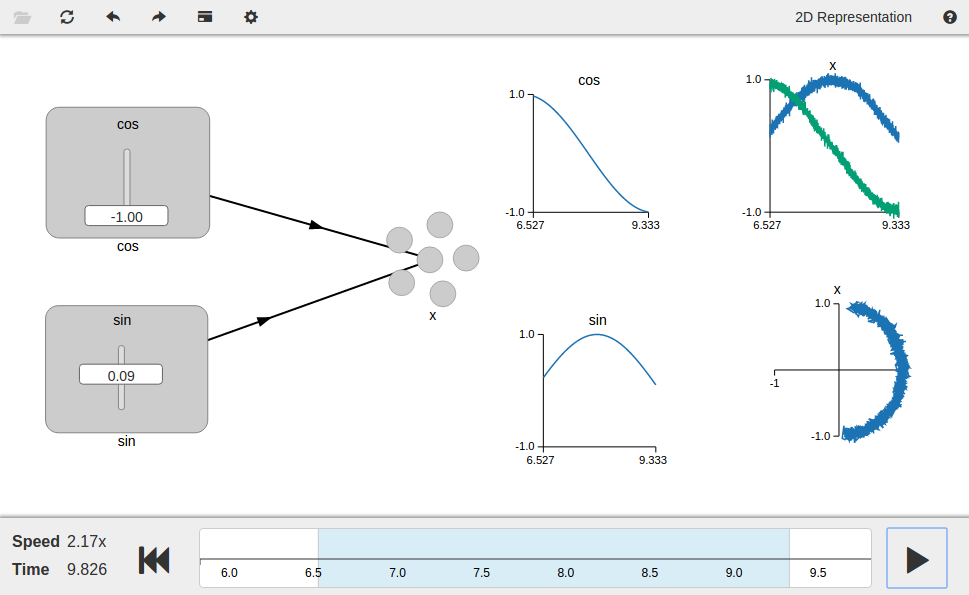

In [12]:
from IPython.display import Image
Image(filename='vectors.png')